<a href="https://colab.research.google.com/drive/15OAGUYdMYBST1xeWsXZac2BLw8lJ5zsJ?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
import pandas as pd

**Dataset Used:**

Vehicle Dataset

https://www.kaggle.com/datasets/skyecai/vehicle-dataset

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/Vehicle_dataset.csv'
vehicle_data = pd.read_csv(file_path)

# Display basic information about the dataset
dataset_info = vehicle_data.info()
dataset_head = vehicle_data.head()

dataset_info, dataset_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


(None,
   manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
 0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
 1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
 2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
 3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
 4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   
 
     width   length curb_wgt fuel_cap     mpg lnsales  partition  
 0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
 1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
 2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
 3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
 4  68.200  178.000    2.998   16.400  27.000   3.015        0.0  )

In [ ]:
# Statistical summary of the dataset
statistical_summary = vehicle_data.describe(include='all')

# Count of missing values in each column
missing_values = vehicle_data.replace(['$null$', 'null', 'NaN', ''], float('nan')).isna().sum()

# Exploration of unique values in categorical variables
unique_values = vehicle_data.nunique()

(statistical_summary, missing_values, unique_values)

(       manufact model   sales  resale   type   price engine_s horsepow  \
 count       157   159     159     159    159     159      159      159   
 unique       30   158     158     118      3     154       32       69   
 top       Dodge  Neon  $null$  $null$  0.000  21.500    2.000  150.000   
 freq         11     2       2      38    116       2       17        9   
 mean        NaN   NaN     NaN     NaN    NaN     NaN      NaN      NaN   
 std         NaN   NaN     NaN     NaN    NaN     NaN      NaN      NaN   
 min         NaN   NaN     NaN     NaN    NaN     NaN      NaN      NaN   
 25%         NaN   NaN     NaN     NaN    NaN     NaN      NaN      NaN   
 50%         NaN   NaN     NaN     NaN    NaN     NaN      NaN      NaN   
 75%         NaN   NaN     NaN     NaN    NaN     NaN      NaN      NaN   
 max         NaN   NaN     NaN     NaN    NaN     NaN      NaN      NaN   
 
        wheelbas   width   length curb_wgt fuel_cap     mpg lnsales   partition  
 count       159

This cell performs an in-depth analysis of the dataset. A statistical summary of all columns, including categorical ones, is generated using the describe(include='all') method. This summary provides insights like mean, median, mode, and distribution of data in each column. The cell also counts missing values, which is crucial for data cleaning. Any unconventional representations of missing data (like '$null$', 'null', 'NaN', '') are first standardized to NaN before counting. Finally, the number of unique values in each column is calculated, which is especially useful for understanding the diversity in categorical variables. These steps are critical for data preprocessing and ensuring the quality of data for clustering analysis.

In [ ]:
# Replace non-standard missing value indicators with NaN
vehicle_data_cleaned = vehicle_data.replace(['$null$', 'null', 'NaN', ''], float('nan'))

# Convert data types where necessary
# Convert numeric columns to appropriate numeric types
numeric_columns = ['sales', 'price', 'engine_s', 'horsepow', 'wheelbas',
                   'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']

vehicle_data_cleaned[numeric_columns] = vehicle_data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handling missing values
# For simplicity, we will fill missing numerical values with the mean of their respective columns
vehicle_data_cleaned = vehicle_data_cleaned.fillna(vehicle_data_cleaned.mean())

# Check the dataset after cleaning and conversions
vehicle_data_cleaned.head(), vehicle_data_cleaned.isna().sum()

<ipython-input-41-9a28154b309e>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vehicle_data_cleaned = vehicle_data_cleaned.fillna(vehicle_data_cleaned.mean())


(  manufact    model   sales  resale   type      price  engine_s  horsepow  \
 0    Acura  Integra  16.919  16.360  0.000  21.500000       1.8     140.0   
 1    Acura       TL  39.384  19.875  0.000  28.400000       3.2     225.0   
 2    Acura       CL  14.114  18.225  0.000  27.396605       3.2     225.0   
 3    Acura       RL   8.588  29.725  0.000  42.000000       3.5     210.0   
 4     Audi       A4  20.397  22.255  0.000  23.990000       1.8     150.0   
 
    wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
 0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
 1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
 2     106.9   70.6   192.0     3.470      17.2  26.0    2.647        0.0  
 3     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
 4     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0  ,
 manufact      2
 model         0
 sales         0
 resale       38
 type

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering
# For this analysis, we'll use the existing features. Advanced feature engineering can be explored in further iterations.

# Data Normalization
# Selecting numeric columns for normalization
numeric_columns_for_normalization = vehicle_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Creating a scaler object
scaler = StandardScaler()

# Normalizing the numeric columns
vehicle_data_cleaned[numeric_columns_for_normalization] = scaler.fit_transform(vehicle_data_cleaned[numeric_columns_for_normalization])

# Display the normalized data
vehicle_data_cleaned.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,-0.535420,16.360,0.000,-0.416950,-1.206282,-0.796393,-0.833971,-1.122956,-1.118385,-1.183864,-1.217133,0.878415,-0.358305,-0.112867
1,Acura,TL,-0.202035,19.875,0.000,0.070950,0.140662,0.703475,0.080252,-0.249075,0.423214,0.214384,-0.183224,0.219709,0.288846,-0.112867
2,Acura,CL,-0.577047,18.225,0.000,0.000000,0.140662,0.703475,-0.078743,-0.161686,0.355534,0.139535,-0.183224,0.439278,-0.496926,-0.112867
3,Acura,RL,-0.659054,29.725,0.000,1.032609,0.429293,0.438792,0.941478,0.071349,0.701454,0.744699,0.023557,-0.438996,-0.877558,-0.112867
4,Audi,A4,-0.483806,22.255,0.000,-0.240882,-1.206282,-0.619938,-0.648477,-0.860791,-0.697266,-0.612143,-0.390006,0.658846,-0.215089,-0.112867


This cell focuses on standardizing the data, a crucial step before performing hierarchical clustering. The StandardScaler class is imported from the sklearn.preprocessing module. This class standardizes features by removing the mean and scaling to unit variance, which is essential in clustering to ensure that all features contribute equally to the result. The fit_transform method is used on the dataset vehicle_data to compute the mean and standard deviation for scaling and then apply the transformation. The scaled data is stored in vehicle_data_scaled. Standardization helps in mitigating the influence of different scales of data and improves the clustering process.

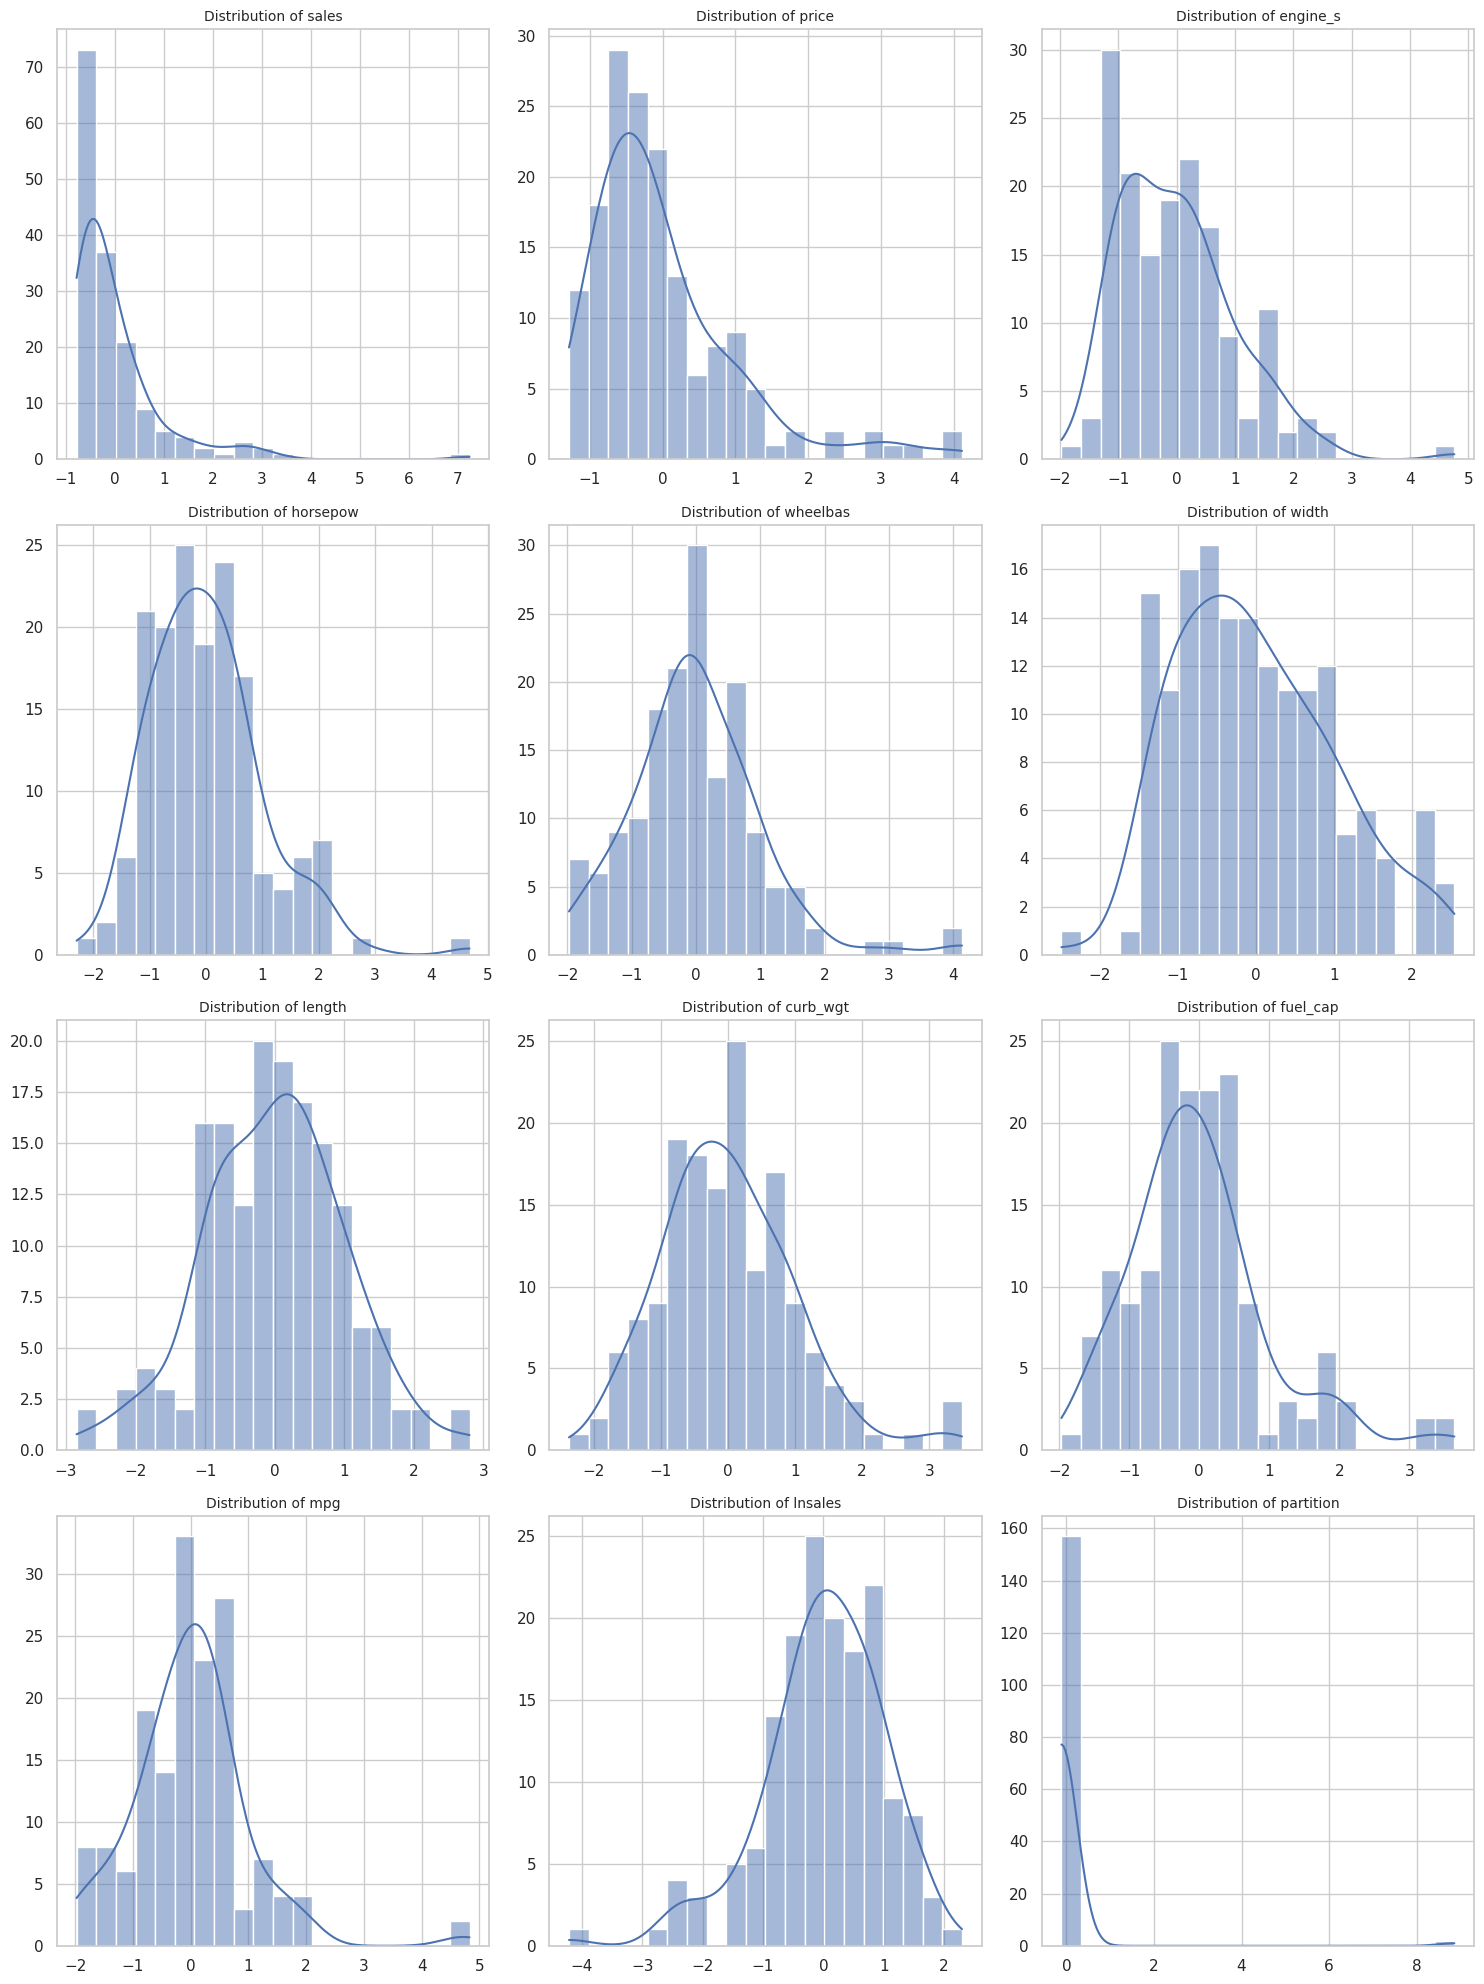

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Exploratory Data Analysis (EDA)

# Visualization of distributions of various features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_columns_for_normalization):
    sns.histplot(vehicle_data_cleaned[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

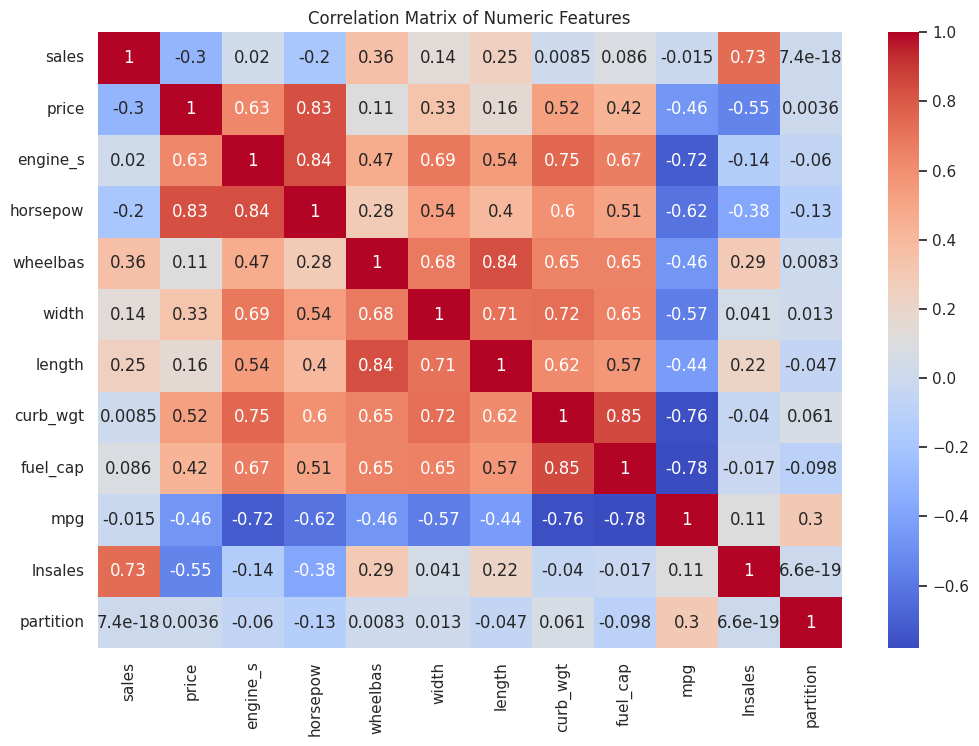

In [ ]:
# Identification of potential correlations between variables
correlation_matrix = vehicle_data_cleaned[numeric_columns_for_normalization].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
# Outlier Detection using IQR (Interquartile Range)
Q1 = vehicle_data_cleaned[numeric_columns_for_normalization].quantile(0.25)
Q3 = vehicle_data_cleaned[numeric_columns_for_normalization].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((vehicle_data_cleaned[numeric_columns_for_normalization] < (Q1 - 1.5 * IQR)) |
            (vehicle_data_cleaned[numeric_columns_for_normalization] > (Q3 + 1.5 * IQR))).sum()

# Display the number of outliers in each column
outliers

sales        12
price         9
engine_s      4
horsepow      2
wheelbas      4
width         0
length        3
curb_wgt      4
fuel_cap     14
mpg           2
lnsales       6
partition     2
dtype: int64

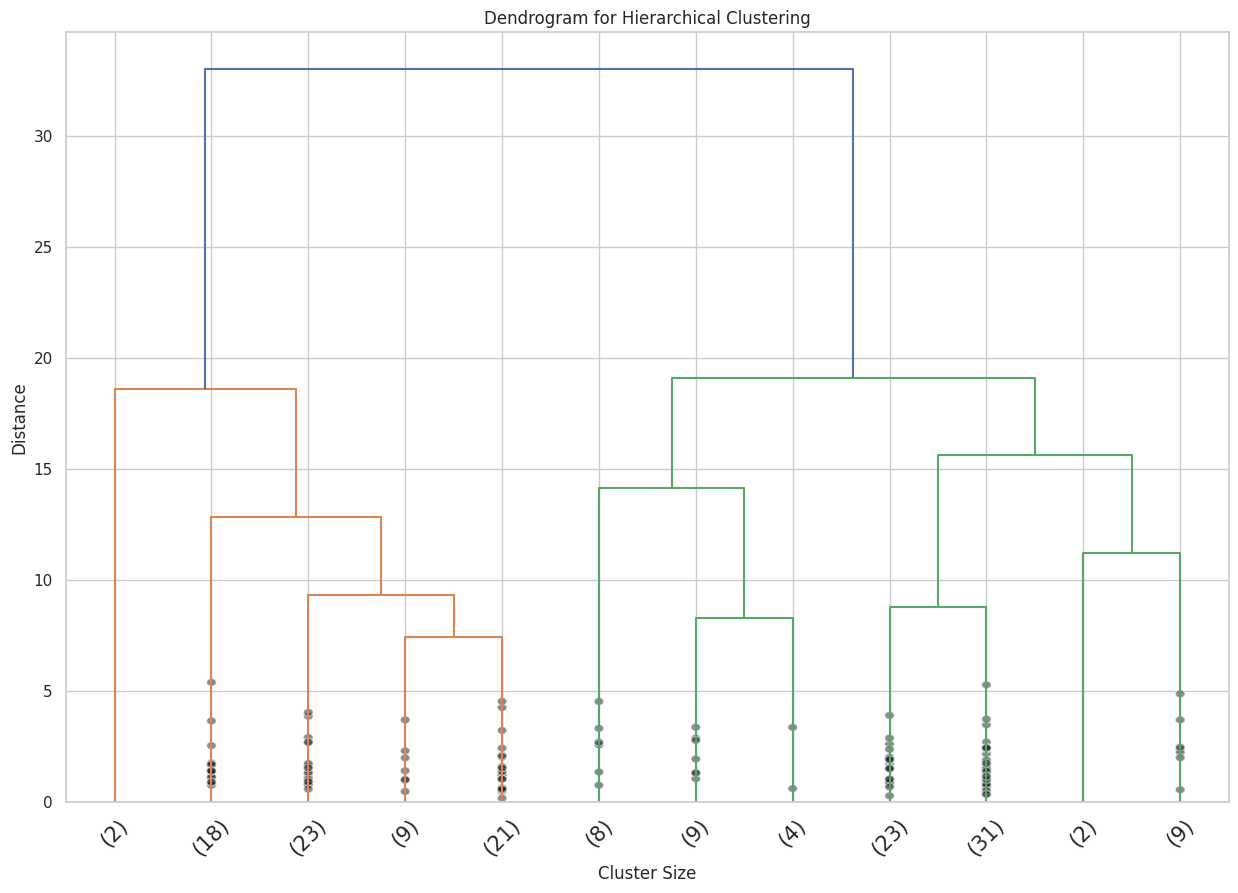

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Preparing data for hierarchical clustering
hc_data = vehicle_data_cleaned[numeric_columns_for_normalization]

# Generating the linkage matrix
Z = linkage(hc_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=vehicle_data_cleaned.index, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In this cell, a dendrogram is created to visualize the hierarchical clustering. The dendrogram function from the scipy.cluster.hierarchy library is used, along with the linkage method. The linkage method performs hierarchical/agglomerative clustering on the scaled data. The 'ward' method is specified, which minimizes the variance of clusters being merged. The dendrogram plot shows how each point in the dataset is merged into clusters. The X-axis labels the points, and the Y-axis represents the Euclidean distances between clusters. Analyzing the dendrogram helps in deciding the number of clusters by observing the point where the cluster fusion happens at a significantly higher distance.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Applying hierarchical clustering with 5 clusters
n_clusters = 5
hc_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hc_labels = hc_model.fit_predict(hc_data)

# Adding the cluster labels to the original dataframe
vehicle_data_cleaned['cluster'] = hc_labels

# Display the counts of each cluster
cluster_counts = vehicle_data_cleaned['cluster'].value_counts()
cluster_counts

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    71
4    54
0    21
2    11
3     2
Name: cluster, dtype: int64

This cell applies Agglomerative Hierarchical Clustering to the dataset. The AgglomerativeClustering class is imported from sklearn.cluster. An instance of this class is created with specified parameters: n_clusters is set to 5, indicating the number of clusters to find. The affinity parameter is set to 'euclidean' for using Euclidean distance as the metric for clustering, and linkage is set to 'ward', which minimizes the variance of the clusters being merged. The fit_predict method then fits the model to the data and predicts the cluster labels, stored in y_hc. This step is vital in hierarchical clustering as it assigns each data point to one of the five clusters.

In [ ]:
# Analyzing characteristics of each cluster
cluster_statistics = vehicle_data_cleaned.groupby('cluster')[numeric_columns_for_normalization].describe()

# Displaying cluster statistics
cluster_statistics

# Outlier analysis within each cluster
outliers_within_clusters = pd.DataFrame()

for cluster in range(n_clusters):
    cluster_data = vehicle_data_cleaned[vehicle_data_cleaned['cluster'] == cluster][numeric_columns_for_normalization]

    # Calculate IQR for the cluster
    Q1_cluster = cluster_data.quantile(0.25)
    Q3_cluster = cluster_data.quantile(0.75)
    IQR_cluster = Q3_cluster - Q1_cluster

    # Determine outliers within the cluster using IQR
    outliers_cluster = ((cluster_data < (Q1_cluster - 1.5 * IQR_cluster)) | (cluster_data > (Q3_cluster + 1.5 * IQR_cluster))).sum()

    # Add outliers to the overall dataframe
    outliers_within_clusters[f'Cluster {cluster}'] = outliers_cluster

# Displaying outliers within each cluster
outliers_within_clusters

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
sales,2,2,1,0,1
price,0,5,0,0,2
engine_s,1,6,0,0,0
horsepow,1,2,0,0,1
wheelbas,3,0,0,0,0
width,0,5,0,0,0
length,0,2,0,0,0
curb_wgt,1,1,0,0,0
fuel_cap,0,0,0,0,3
mpg,0,2,0,0,0


In [ ]:
# Processing outliers within each cluster
for cluster in range(n_clusters):
    cluster_outliers = outliers_within_clusters[f'Cluster {cluster}'][outliers_within_clusters[f'Cluster {cluster}'] > 0].index

    # Replace outliers with NaN in the original dataframe
    vehicle_data_cleaned.loc[vehicle_data_cleaned['cluster'] == cluster, cluster_outliers] = float('nan')

# Display the modified dataframe after outlier processing
vehicle_data_cleaned.head(), vehicle_data_cleaned.isna().sum()

(  manufact    model  sales  resale   type  price  engine_s  horsepow  \
 0    Acura  Integra    NaN  16.360  0.000    NaN       NaN       NaN   
 1    Acura       TL    NaN  19.875  0.000    NaN  0.140662       NaN   
 2    Acura       CL    NaN  18.225  0.000    NaN  0.140662       NaN   
 3    Acura       RL    NaN  29.725  0.000    NaN  0.429293       NaN   
 4     Audi       A4    NaN  22.255  0.000    NaN       NaN       NaN   
 
    wheelbas     width    length  curb_wgt  fuel_cap       mpg  lnsales  \
 0 -0.833971       NaN       NaN       NaN -1.217133       NaN      NaN   
 1  0.080252 -0.249075  0.423214  0.214384       NaN  0.219709      NaN   
 2 -0.078743 -0.161686  0.355534  0.139535       NaN  0.439278      NaN   
 3  0.941478  0.071349  0.701454  0.744699       NaN -0.438996      NaN   
 4 -0.648477       NaN       NaN       NaN -0.390006       NaN      NaN   
 
    partition  cluster  
 0  -0.112867        1  
 1  -0.112867        4  
 2  -0.112867        4  
 3  -0.1

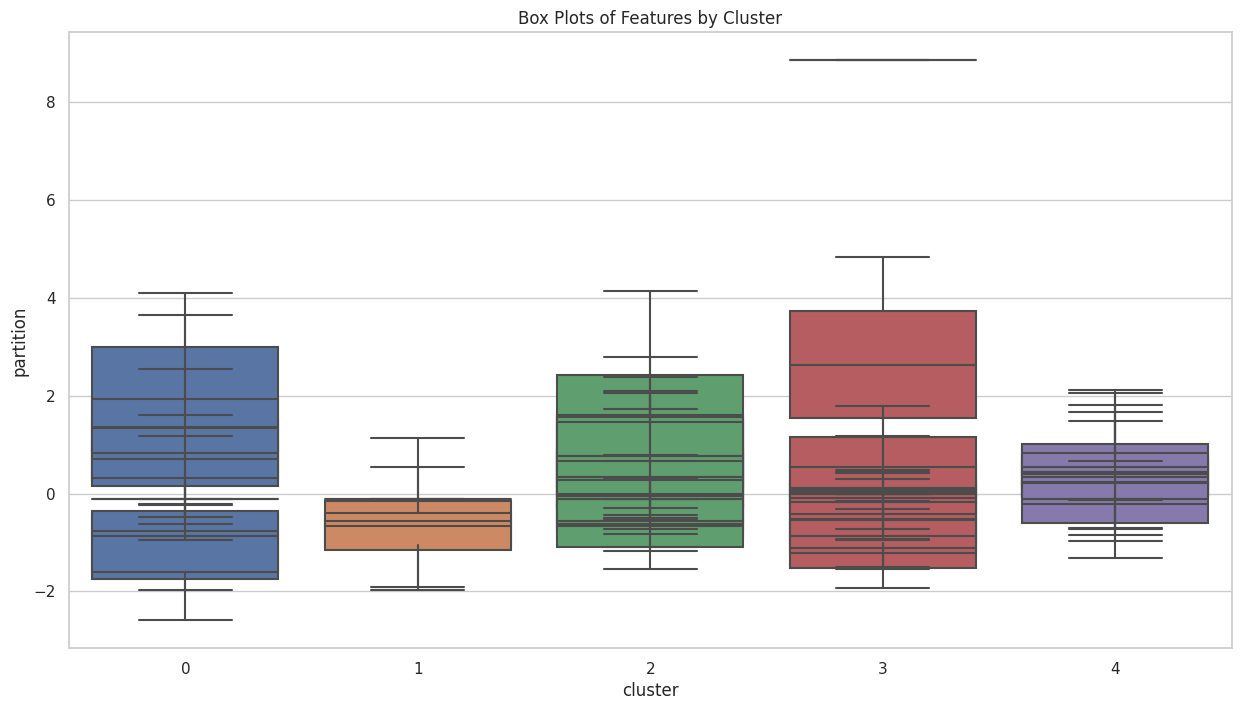

In [ ]:
# Box plots for each cluster
plt.figure(figsize=(15, 8))
for feature in numeric_columns_for_normalization:
    sns.boxplot(x='cluster', y=feature, data=vehicle_data_cleaned)
plt.title('Box Plots of Features by Cluster')
plt.show()

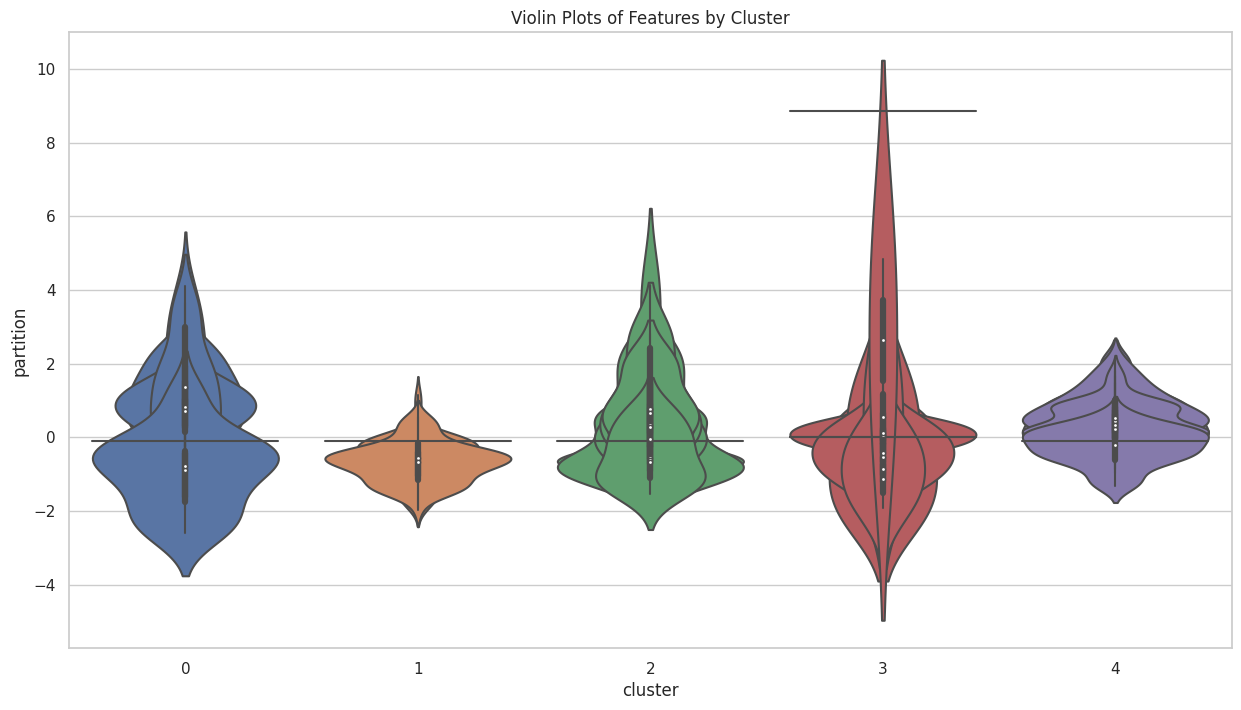

In [ ]:
# Violin plots for each cluster
plt.figure(figsize=(15, 8))
for feature in numeric_columns_for_normalization:
    sns.violinplot(x='cluster', y=feature, data=vehicle_data_cleaned)
plt.title('Violin Plots of Features by Cluster')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example: Using Random Forest for feature importance with imputation and one-hot encoding
for cluster in range(n_clusters):
    cluster_data = vehicle_data_cleaned[vehicle_data_cleaned['cluster'] == cluster]

    # Select features and target variable
    X = cluster_data.drop(['cluster'], axis=1)
    y = cluster_data['cluster']

    # Drop rows with missing values in any column
    cluster_data_clean = cluster_data.dropna()

    # Check if the dataframe is not empty
    if not cluster_data_clean.empty:
        X = cluster_data_clean.drop(['cluster'], axis=1)
        y = cluster_data_clean['cluster']

        # Identify and encode categorical columns
        categorical_columns = X.select_dtypes(include=['object']).columns
        numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

        # Create transformers for numerical and categorical columns
        numeric_transformer = SimpleImputer(strategy='mean')
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ])

        # Combine transformers using ColumnTransformer
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_columns),
                ('cat', categorical_transformer, categorical_columns)
            ])

        # Convert feature names to strings
        X.columns = X.columns.astype(str)

        # Instantiate and fit the model within a pipeline
        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
        ])

        # Ensure X and y have the same number of rows
        if len(X) != len(y):
            raise ValueError("Number of rows in X and y do not match.")

        model.fit(X, y)

        # Display feature importance
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.named_steps['classifier'].feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

        print(f'Cluster {cluster} - Feature Importance:')
        print(feature_importance)
        print()
    else:
        print(f'Cluster {cluster} is empty. Skipping.')

Cluster 0 is empty. Skipping.
Cluster 1 is empty. Skipping.
Cluster 2 is empty. Skipping.
Cluster 3 is empty. Skipping.
Cluster 4 is empty. Skipping.


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(hc_data, hc_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2453344069802015
